# Problem Statement

The data given is of the mutual funds in the USA. The objective of this problem is to predict the ‘basis point spread’ over AAA bonds i.e. feature ‘bonds_aaa’ against each Serial Number.

Basis Point Spread indicates the additional return a mutual fund would give over the AAA-rated bonds.

# About the dataset

- Train.csv : The data file train.csv contains the 9518 instances with the 153 features including the target feature.
- Test.csv : The datafile test.csv contains the 2380instances with the 152 features excluding the target feature.


In [1]:
# import the modules
# load dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')

#print shape
print(data_train.shape)

# drop serial number
data_train.drop(columns='Serial Number',inplace=True)


(9518, 154)


In [3]:
data_train.head(5)

,Id,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3768,211000,1.90,3,0.95,99.05,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1,6244,98930000,1.57,2,0.00,0.00,100.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.65
2,2230,440000000,0.53,4,1.71,0.00,98.29,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.20
3,7518,56050000,0.93,3,2.64,31.29,57.06,0.80,7.62,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.64
4,8037,173040000,2.26,2,5.24,94.75,0.00,0.01,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00


In [4]:
data_train.columns

Index(['Id', 'total_net_assets', 'net_annual_expenses_ratio',
       'morningstar_rating', 'portfolio_cash', 'portfolio_stocks',
       'portfolio_bonds', 'portfolio_others', 'portfolio_preferred',
       'portfolio_convertable',
       ...
       'category_102', 'category_103', 'category_104', 'category_105',
       'category_106', 'category_107', 'investment_0', 'investment_1',
       'investment_2', 'bonds_aaa'],
      dtype='object', length=153)

In [5]:
# print dataset info
data_train.describe()

,Id,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
count,9518.000000,9.518000e+03,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,...,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000
mean,5972.644988,2.473000e+09,1.018988,2.752994,6.853698,59.393899,30.249100,1.577069,0.371074,0.646013,...,0.001891,0.000315,0.020172,0.011452,0.034251,0.005358,0.466905,0.262135,0.270960,12.419950
std,3435.630920,1.050165e+10,0.607111,1.363690,11.577991,42.067778,38.712283,6.416054,2.539131,5.360963,...,0.043449,0.017752,0.140597,0.106405,0.181883,0.073008,0.498930,0.439819,0.444479,23.569492
min,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,3003.500000,6.994750e+07,0.610000,2.000000,1.122500,0.590000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5979.000000,3.255700e+08,0.960000,3.000000,2.950000,83.180000,1.390000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8950.750000,1.410000e+09,1.370000,4.000000,6.690000,97.460000,65.702500,0.870000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,13.310000
max,11896.000000,1.880000e+11,7.070000,5.000000,100.000000,100.000000,100.000000,94.710000,71.420000,93.820000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.790000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9518 entries, 0 to 9517
Columns: 153 entries, Id to bonds_aaa
dtypes: float64(148), int64(5)
memory usage: 11.1 MB


In [7]:
data_train.dtypes

Id                             int64
total_net_assets               int64
net_annual_expenses_ratio    float64
morningstar_rating             int64
portfolio_cash               float64
                              ...   
category_107                 float64
investment_0                 float64
investment_1                 float64
investment_2                 float64
bonds_aaa                    float64
Length: 153, dtype: object

In [8]:
data_train.isnull().sum()

Id                           0
total_net_assets             0
net_annual_expenses_ratio    0
morningstar_rating           0
portfolio_cash               0
                            ..
category_107                 0
investment_0                 0
investment_1                 0
investment_2                 0
bonds_aaa                    0
Length: 153, dtype: int64

### As ther are no missing values and also all cat_values are converted in numerical form

**Check for the categorical & continuous features.**

In [9]:
# Seperate continuous variables and categorical variables
dataframe_con = data_train.select_dtypes(include=np.number)
dataframe_cat = data_train.select_dtypes(exclude=np.number)

In [10]:
dataframe_cat.columns.values.sum()

0

In [11]:
dataframe_con.columns

Index(['Id', 'total_net_assets', 'net_annual_expenses_ratio',
       'morningstar_rating', 'portfolio_cash', 'portfolio_stocks',
       'portfolio_bonds', 'portfolio_others', 'portfolio_preferred',
       'portfolio_convertable',
       ...
       'category_102', 'category_103', 'category_104', 'category_105',
       'category_106', 'category_107', 'investment_0', 'investment_1',
       'investment_2', 'bonds_aaa'],
      dtype='object', length=153)

In [12]:
#dataframe_con.columns.values.sum()

**Check for the correlation between the features and do some Hypothesis Testing to see if there is strong association between features.**

# Chi-square contingency test

In [13]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)   # Df = number of variable categories(in purpose) - 1

In [14]:
print("Critical Value: ", critical_value)

Critical Value:  19.67513757268249


In [15]:
# Subsetting the dataframe
return_rating = data_train.morningstar_return_rating.value_counts()
risk_rating = data_train.morningstar_risk_rating.value_counts()

#Concating yes and no into a single dataframe
observed=pd.concat([return_rating.transpose(),risk_rating.transpose()], axis = 1,keys=['return','risk'])

chi2, p, dof, ex = chi2_contingency(observed)


print("p value:")
print(p)


print("Chi Statistic:")
print(chi2)

p value:
0.00032309085443671745
Chi Statistic:
23.099539737235563


In [16]:
if chi2 > critical_value:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


**Clean the data, remove correlated features and apply some data preprocessing techniques**

In [17]:
# check the correlation
data_train.corr()
correlation = data_train.corr().abs()

# unstack and sort the values
us_correlation = correlation.unstack()
us_correlation = us_correlation.sort_values(ascending=False)

# max correlated features between 0.75 to 1
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]
print(max_correlated)

# drop highly correlated features
data_train.drop(columns=['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],inplace=True)

morningstar_rating         morningstar_return_rating    0.964080
morningstar_return_rating  morningstar_rating           0.964080
portfolio_bonds            portfolio_stocks             0.917010
portfolio_stocks           portfolio_bonds              0.917010
category_12                portfolio_convertable        0.899705
portfolio_convertable      category_12                  0.899705
mean_annual_return_3y      sharpe_ratio_3y              0.766910
sharpe_ratio_3y            mean_annual_return_3y        0.766910
dtype: float64


In [18]:
data_train.shape

(9518, 149)

**Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.** 

# OUTLIER CHECK

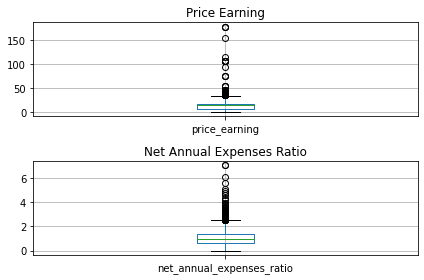

In [19]:
# Code starts here
fig, (ax_1, ax_2) = plt.subplots(nrows=2)
data_train[["price_earning"]].boxplot(ax=ax_1)
ax_1.set_title("Price Earning")
data_train[["net_annual_expenses_ratio"]].boxplot(ax=ax_2)
ax_2.set_title("Net Annual Expenses Ratio")
fig.tight_layout()
plt.show()

# Model Building

In [20]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [21]:
# independent variable 
X = data_train.drop(columns = 'bonds_aaa')

# target variable 
y = data_train.bonds_aaa

# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=3)

# Instantiate linear model
lr = LinearRegression()

# fit the model on training data
lr.fit(X_train,y_train)

# predict on test
y_pred = lr.predict(X_test)

#Calculate rmse
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print(rmse)

16.063572900124257


# Predictor check using GridsearchCV

In [22]:
# import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

In [23]:
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Instantiate ridge models
ridge_model = Ridge()

In [24]:
# apply ridge model
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train, y_train)

# make predictions 
ridge_pred = ridge_grid.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))
print(ridge_rmse)

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60386e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69427e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.97784e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.5958e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.81706e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35832e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14568e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.18854e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.41556e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.79883e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_mo

16.065306137431957


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.47646e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35833e-24): result may not be accurate.
  overwrite_a=True).T


In [25]:
# Instantiate lasso models
lasso_model = Lasso()

# apply lasso model
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train, y_train)

# make predictions
lasso_pred = lasso_grid.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred, y_test))
print(lasso_rmse)

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658667.3378857366, tolerance: 307.51487767438925
  positive)
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626183.5363240297, tolerance: 290.8092764488984
  positive)
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639523.4149298562, tolerance: 305.0520879554314
  positive)
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

16.08126906729195


In [26]:
# check the correlation
data_test.corr()
correlation = data_test.corr().abs()

# unstack and sort the values
us_correlation = correlation.unstack()
us_correlation = us_correlation.sort_values(ascending=False)

# max correlated features between 0.75 to 1
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]
print(max_correlated)

# drop highly correlated features
data_test.drop(columns=['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],inplace=True)

morningstar_rating         morningstar_return_rating    0.961548
morningstar_return_rating  morningstar_rating           0.961548
portfolio_stocks           portfolio_bonds              0.920596
portfolio_bonds            portfolio_stocks             0.920596
portfolio_convertable      category_12                  0.858533
category_12                portfolio_convertable        0.858533
sharpe_ratio_3y            mean_annual_return_3y        0.779664
mean_annual_return_3y      sharpe_ratio_3y              0.779664
dtype: float64


In [27]:
data_test.shape

(2380, 149)

In [28]:
data_test.head(5)

,Id,Serial Number,total_net_assets,net_annual_expenses_ratio,portfolio_cash,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,...,category_101,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2
0,11266,7720,3610000000,0.25,0.04,98.98,0.98,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10140,7649,1010000000,0.44,24.92,44.06,0.09,0.29,0.08,4.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,90,9946,323140000,1.12,34.70,0.00,2.49,0.00,0.00,4.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6882,459,5350000,1.70,9.61,90.40,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6413,6373,4690000,0.21,0.29,0.00,0.00,0.00,0.00,2.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
data_test.drop(columns='Serial Number',inplace=True)

In [30]:
predictions = lr.predict(data_test)
len(list(predictions))

2380

In [31]:
predictions2 = ridge_grid.predict(data_test)
len(list(predictions2))

2380

In [32]:
predictions3 = lasso_grid.predict(data_test)
len(list(predictions3))

2380

In [33]:
# pd.DataFrame(predictions).to_csv("../final_submission_file..csv")

In [35]:
dt_ID = data_test['Id']

In [36]:
submission_file = pd.DataFrame(predictions,index = dt_ID,columns = ['bonds_aaa'])

In [37]:
submission_file.head()

,bonds_aaa
Id,
11266,7.283280
10140,54.297549
90,0.980541
6882,5.171425
6413,-2.511998


In [38]:
submission_file.to_csv('submission_file_mutual_fund.csv', index=True)

In [39]:
submission_file.shape

(2380, 1)

In [40]:
submission_file_Ridge = pd.DataFrame(predictions2,index = dt_ID,columns = ['bonds_aaa'])

In [41]:
submission_file_Ridge.to_csv('submission_file_mutual_fund_Ridge.csv', index=True)

In [42]:
submission_file_Lasso = pd.DataFrame(predictions3,index = dt_ID,columns = ['bonds_aaa'])

In [43]:
submission_file_Lasso.to_csv('submission_file_mutual_fund_Lasso.csv', index=True)